# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_path = "../output_data/"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
while len(cities)<500:
    print(f'Insufficient cities. City count = {len(cities)}')
    lat = np.random.uniform(lat_range[0], lat_range[1])
    lng = np.random.uniform(lng_range[0], lng_range[1])
    city = citipy.nearest_city(lat, lng).city_name
    if city not in cities:
        cities.append(city)

print(f'final city count = {len(cities)}')


final city count = 636


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url="http://api.openweathermap.org/data/2.5/weather?q="
cities_json=[]
        
# break calls up into sets of 50 to add 1sec sleep between sets
sets=np.ceil(len(cities)/50).astype(int)

print(f"Beginning Data Retrieval \n-----------------------------")
for i in range(sets):
    for j in range(50):      
        try:
            url=base_url+cities[(50*i)+j]+"&units=imperial&appid="+weather_api_key
            try:
                print(f'Processing Record \033[96m{j+1}\033[0m of Set \033[96m{i+1}\033[0m | {requests.get(url).json()["name"]}')
                cities_json.append(requests.get(url).json())
            except KeyError:
                print("City \033[1mnot\033[0m found. Skipping...")
        except IndexError:
            break
    time.sleep(1)
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | Hermanus
Processing Record 2 of Set 1 | Hithadhoo
Processing Record 3 of Set 1 | Kapaa
City not found. Skipping...
Processing Record 5 of Set 1 | Rikitea
Processing Record 6 of Set 1 | Katsuura
Processing Record 7 of Set 1 | Butaritari
Processing Record 8 of Set 1 | Arlit
Processing Record 9 of Set 1 | Porto-Novo
Processing Record 10 of Set 1 | Hilo
Processing Record 11 of Set 1 | Ushuaia
Processing Record 12 of Set 1 | Cidreira
Processing Record 13 of Set 1 | East London
City not found. Skipping...
Processing Record 15 of Set 1 | Bereda
Processing Record 16 of Set 1 | Kumul
City not found. Skipping...
Processing Record 18 of Set 1 | Suntar
City not found. Skipping...
Processing Record 20 of Set 1 | Barrow
Processing Record 21 of Set 1 | Vanavara
Processing Record 22 of Set 1 | Busselton
Processing Record 23 of Set 1 | Eydhafushi
Processing Record 24 of Set 1 | Flagstaff
Processing Record 25 of Set 1

Processing Record 44 of Set 3 | Bluff
Processing Record 45 of Set 3 | Rumoi
Processing Record 46 of Set 3 | Havøysund
Processing Record 47 of Set 3 | Jamestown
Processing Record 48 of Set 3 | Olinda
City not found. Skipping...
Processing Record 50 of Set 3 | Rovaniemi
Processing Record 1 of Set 4 | Taltal
City not found. Skipping...
Processing Record 3 of Set 4 | Alofi
Processing Record 4 of Set 4 | Qaanaaq
Processing Record 5 of Set 4 | Codrington
Processing Record 6 of Set 4 | Shimoda
City not found. Skipping...
Processing Record 8 of Set 4 | Broken Hill
City not found. Skipping...
Processing Record 10 of Set 4 | Klaksvík
Processing Record 11 of Set 4 | Mopti
Processing Record 12 of Set 4 | George Town
Processing Record 13 of Set 4 | Labuhan
City not found. Skipping...
Processing Record 15 of Set 4 | Weinan
Processing Record 16 of Set 4 | Lompoc
Processing Record 17 of Set 4 | Grootfontein
Processing Record 18 of Set 4 | Jiexiu
Processing Record 19 of Set 4 | Pathein
Processing Recor

Processing Record 40 of Set 6 | Kahului
Processing Record 41 of Set 6 | Grindavik
Processing Record 42 of Set 6 | Khingansk
City not found. Skipping...
Processing Record 44 of Set 6 | Sindor
Processing Record 45 of Set 6 | Ensley
Processing Record 46 of Set 6 | Iracoubo
Processing Record 47 of Set 6 | Tshikapa
Processing Record 48 of Set 6 | Severo-Kuril'sk
City not found. Skipping...
Processing Record 50 of Set 6 | Lorengau
Processing Record 1 of Set 7 | Tulun
Processing Record 2 of Set 7 | Lebu
Processing Record 3 of Set 7 | Salalah
Processing Record 4 of Set 7 | Aksha
Processing Record 5 of Set 7 | Kupino
Processing Record 6 of Set 7 | Sayyan
Processing Record 7 of Set 7 | Touros
Processing Record 8 of Set 7 | Katete
Processing Record 9 of Set 7 | Pāsighāt
Processing Record 10 of Set 7 | Carupano
Processing Record 11 of Set 7 | Constitución
Processing Record 12 of Set 7 | Ruhengeri
Processing Record 13 of Set 7 | Aswān
Processing Record 14 of Set 7 | Masuguru
Processing Record 15 of

Processing Record 34 of Set 9 | Paamiut
Processing Record 35 of Set 9 | Vostok
Processing Record 36 of Set 9 | Gladstone
Processing Record 37 of Set 9 | Laredo
Processing Record 38 of Set 9 | Asău
Processing Record 39 of Set 9 | Swakopmund
Processing Record 40 of Set 9 | Saint George
Processing Record 41 of Set 9 | Marabá
Processing Record 42 of Set 9 | Bindura
Processing Record 43 of Set 9 | Ampanihy
Processing Record 44 of Set 9 | Bulgan
City not found. Skipping...
Processing Record 46 of Set 9 | Mazamari
Processing Record 47 of Set 9 | Bahía Honda
City not found. Skipping...
Processing Record 49 of Set 9 | Karratha
Processing Record 50 of Set 9 | Altamira
Processing Record 1 of Set 10 | Samarai
City not found. Skipping...
Processing Record 3 of Set 10 | Penzance
Processing Record 4 of Set 10 | Scottsboro
Processing Record 5 of Set 10 | Chingirlau
Processing Record 6 of Set 10 | Hornepayne
Processing Record 7 of Set 10 | Kruisfontein
Processing Record 8 of Set 10 | Alghero
Processing

Processing Record 26 of Set 12 | Hualmay
Processing Record 27 of Set 12 | Mexico
Processing Record 28 of Set 12 | Portobelo
Processing Record 29 of Set 12 | Jishu
Processing Record 30 of Set 12 | Malanje
Processing Record 31 of Set 12 | Zhezkazgan
City not found. Skipping...
Processing Record 33 of Set 12 | Swift Current
Processing Record 34 of Set 12 | San Luis
Processing Record 35 of Set 12 | Xai-Xai
Processing Record 36 of Set 12 | Sisimiut
Processing Record 37 of Set 12 | Pala
Processing Record 38 of Set 12 | Chumikan
Processing Record 39 of Set 12 | Necochea
Processing Record 40 of Set 12 | Saint-Augustin
Processing Record 41 of Set 12 | Beyneu
Processing Record 42 of Set 12 | Rio Grande
Processing Record 43 of Set 12 | Abbeville
Processing Record 44 of Set 12 | Brewster
Processing Record 45 of Set 12 | Shetpe
Processing Record 46 of Set 12 | Isfahan
Processing Record 47 of Set 12 | Marsaxlokk
Processing Record 48 of Set 12 | Aloleng
Processing Record 49 of Set 12 | Sambava
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_df=pd.DataFrame()

for i in range(len(cities_json)):
    cities_df.loc[i,"City"]=cities_json[i]["name"]
    cities_df.loc[i,"Lat"]=cities_json[i]["coord"]["lat"]
    cities_df.loc[i,"Lng"]=cities_json[i]["coord"]["lon"]
    cities_df.loc[i,"Max Temp"]=cities_json[i]["main"]["temp_max"]
    cities_df.loc[i,"Humidity"]=cities_json[i]["main"]["humidity"]
    cities_df.loc[i,"Cloudiness"]=cities_json[i]["clouds"]["all"]
    cities_df.loc[i,"Wind Speed"]=cities_json[i]["wind"]["speed"]
    cities_df.loc[i,"Country"]=cities_json[i]["sys"]["country"]
    cities_df.loc[i,"Date"]=str(cities_json[i]["dt"])

cities_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [6]:
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,60.01,79.0,2.0,5.01,ZA,1593506973
1,Hithadhoo,-0.60,73.08,84.65,64.0,15.0,3.40,MV,1593506703
2,Kapaa,22.08,-159.32,78.80,78.0,90.0,11.41,US,1593506975
3,Rikitea,-23.12,-134.97,69.06,58.0,84.0,18.21,PF,1593506976
4,Katsuura,35.13,140.30,78.80,94.0,75.0,16.11,JP,1593506802


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,20.002178,18.040105,69.901568,68.170732,53.351916,8.060523
std,33.220746,88.978510,15.420214,24.358981,37.707030,5.282141
min,-54.800000,-179.170000,23.000000,3.000000,0.000000,0.110000
25%,-6.870000,-59.257500,59.000000,53.000000,12.500000,4.180000
50%,22.690000,24.405000,71.625000,75.000000,64.500000,6.930000
75%,48.777500,95.327500,81.120000,87.000000,90.000000,10.940000
max,78.220000,179.320000,109.400000,100.000000,100.000000,43.620000


In [8]:
#  Get the indices of cities that have humidity over 100%.
print(cities_df.index[cities_df["Humidity"]>100])


Int64Index([], dtype='int64')


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers.
# Note in this case there are no cities with humidity over 100%, but putting in this step nonetheless.
clean_cities_df=cities_df[cities_df["Humidity"]<=100]
clean_cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.42,19.23,60.01,79.0,2.0,5.01,ZA,1593506973
1,Hithadhoo,-0.60,73.08,84.65,64.0,15.0,3.40,MV,1593506703
2,Kapaa,22.08,-159.32,78.80,78.0,90.0,11.41,US,1593506975
3,Rikitea,-23.12,-134.97,69.06,58.0,84.0,18.21,PF,1593506976
4,Katsuura,35.13,140.30,78.80,94.0,75.0,16.11,JP,1593506802


In [16]:
# Export the City_Data into a csv
clean_cities_df.to_csv(output_data_path+"cities.csv",index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

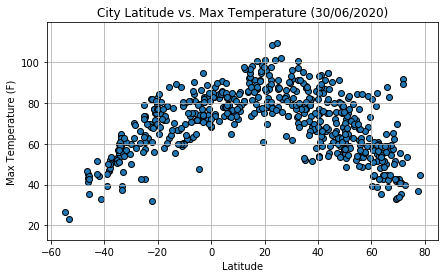

In [17]:
plt.figure(figsize=(7,4))
plt.scatter(clean_cities_df["Lat"],clean_cities_df["Max Temp"],color="tab:blue",edgecolor="black")
plt.ylim(clean_cities_df["Max Temp"].min()-10,clean_cities_df["Max Temp"].max()+10)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (30/06/2020)")
plt.savefig(output_data_path+"Fig1.png")

The above scatter plot shows how the temperature of cities (plotted as farenheit) across the world change in relation to their latitude. Temperature is collected on the 30th of June, 2020. The plot shows that there is a curvilinear relationship between city temperature and latitude, where temperature is higher in cities closer to the equator (latitude = 0).

## Latitude vs. Humidity Plot

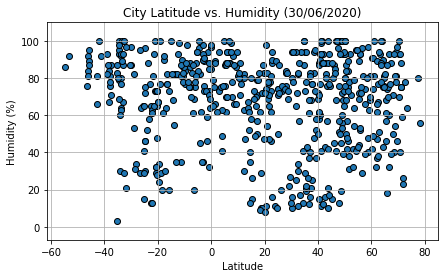

In [18]:
plt.figure(figsize=(7,4))
plt.scatter(clean_cities_df["Lat"],clean_cities_df["Humidity"],color="tab:blue",edgecolor="black")
plt.ylim(clean_cities_df["Humidity"].min()-10,clean_cities_df["Humidity"].max()+10)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (30/06/2020)")
plt.savefig(output_data_path+"Fig2.png")

The above scatter plot shows how the humidity (in percentage) of cities across the world change in relation to their latitude. Humidity data is collected on the 30th of June, 2020. The plot does not indicate humidity changes in cities from different latitudes.

## Latitude vs. Cloudiness Plot

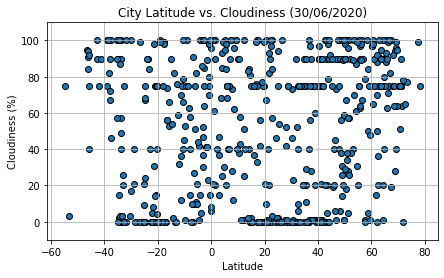

In [20]:
plt.figure(figsize=(7,4))
plt.scatter(clean_cities_df["Lat"],clean_cities_df["Cloudiness"],color="tab:blue",edgecolor="black")
plt.ylim(clean_cities_df["Cloudiness"].min()-10,clean_cities_df["Cloudiness"].max()+10)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (30/06/2020)")
plt.savefig(output_data_path+"Fig3.png")

The above plot shows how the cloudiness (in percentage) of cities across the world change in relation to their latitude. Cloudiness data is collected on the 30th of June, 2020. The plot does not indicate cloudiness changes in cities from different latitudes.

## Latitude vs. Wind Speed Plot

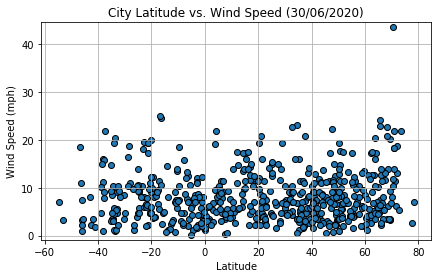

In [34]:
plt.figure(figsize=(7,4))
plt.scatter(clean_cities_df["Lat"],clean_cities_df["Wind Speed"],color="tab:blue",edgecolor="black")
plt.ylim(clean_cities_df["Wind Speed"].min()-1,clean_cities_df["Wind Speed"].max()+1)
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (30/06/2020)")
plt.savefig(output_data_path+"Fig4.png")

The above plot shows how the wind speed (in miles per hour) of cities across the world change in relation to their latitude. Wind speed data is collected on the 30th of June, 2020. While the plot does not indicate wind speed to change much in cities from different latitudes, there is a single outlier city at approximately latitude 70 with a very high wind speed on the day of data collection (30th June).

## Linear Regression

In [21]:
# Create Northern and Southern Hemisphere DataFrames
nt_clean_df=clean_cities_df[clean_cities_df["Lat"]>=0]
st_clean_df=clean_cities_df[clean_cities_df["Lat"]<0]

data=[nt_clean_df,st_clean_df]
colname=["Max Temp","Humidity","Cloudiness","Wind Speed"]

# Create arrays of the linear regression parameters 
# for each variable of interest (temp, humidity, cloudiness, wind speed)
# across northern and southern hemisphere
slope_all=[]
intercept_all=[]
rval_all=[]
pval_all=[]
se_all=[]
ypred=[]

for i in range(len(colname)):
    for df in data:
        (slope,intercept,rval,pval,se)=linregress(df["Lat"],df[colname[i]])
        slope_all.append(slope)
        intercept_all.append(intercept)
        rval_all.append(rval)
        pval_all.append(pval)
        se_all.append(se)
        ypred.append(intercept+slope*df["Lat"])

In [42]:
# OPTIONAL: Create a function to create Linear Regression plots
def linreg_plot(hemi,var):
    if hemi=="North":
        dataframe=nt_clean_df
        index=colname.index(var)*2
    elif hemi=="South":
        dataframe=st_clean_df
        index=colname.index(var)*2+1
    print(f"The r-squared \033[1mis\033[0m: \033[96m{rval_all[index]**2}\033[0m")
    plt.figure(figsize=(7,4))
    plt.scatter(dataframe["Lat"],dataframe[var],color="tab:blue")
    plt.plot(dataframe["Lat"],ypred[index],color="red")
    if dataframe[var].max()-dataframe[var].min()>50:
        y_offset=10
    else:
        y_offset=1
    if var=="Max Temp":
        units="F"
    elif var=="Wind Speed":
        units="mph"
    else:
        units="%"
    plt.ylim(dataframe[var].min()-y_offset,dataframe[var].max()+y_offset)
    plt.title(f'City Latitude vs. {var} ({units}) in the {hemi}ern Hemisphere')
    plt.xlabel("Latitude")
    plt.ylabel(f'{var} ({units})')
    plt.annotate(f"y = {round(slope_all[index],2)}x + {round(intercept_all[index],2)}",\
                 xy=(0.05, 0.9), xycoords='axes fraction',color="red",fontsize=16)
    plt.savefig(f'{output_data_path}{hemi}_{var}.png')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4495137089196345


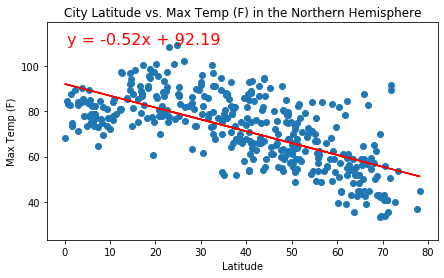

In [43]:
linreg_plot("North","Max Temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5636410568482284


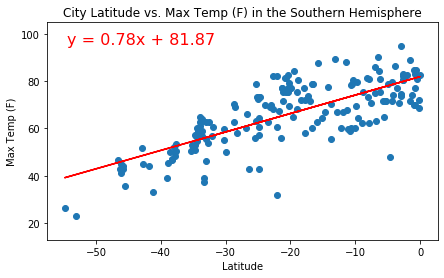

In [45]:
linreg_plot("South","Max Temp")

The above two scatter plots show the change in temperature (Farenheit) in cities across the northern and southern hemisphere respectively as latitude changes. They are overlaid with their respective linear regression line, showing a moderate-strong correlation between temperature and latitude in both the northern and southern hemispheres. In the northern hemisphere, for every 1 degree increase in latitude, there is a predicted drop in temperature of 0.52F, with the r-squared value indicating that approximately 45% of the variance in temperature can be predicted by the latitude. In the southern hemisphere, for every 1 degree increase in latitude, there is a predicted increase in temperature of 0.78F, with the r-squared value indicates that approximately 56% of the variance in temperature can be predicted by the latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 1.4192745854255354e-05


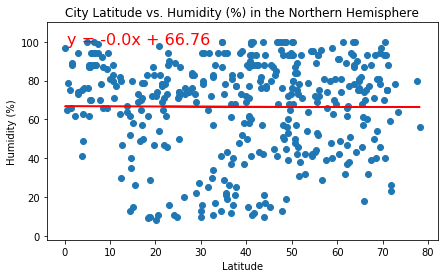

In [46]:
linreg_plot("North","Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0007992968543357337


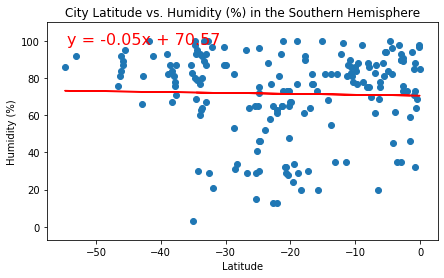

In [47]:
linreg_plot("South","Humidity")

The above two scatter plots show the change in humidity (percentage) in cities across the northern and southern hemisphere respectively as latitude changes. They are overlaid with their respective linear regression line, which show that there are no strong relationships between latitude and humidity in either of the northern or southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.037179985004343136


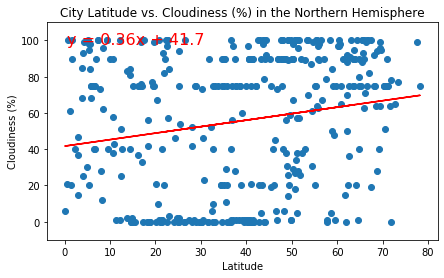

In [48]:
linreg_plot("North","Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0035050379710972637


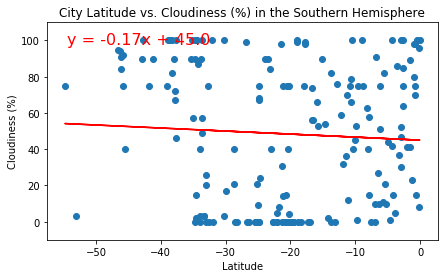

In [49]:
linreg_plot("South","Cloudiness")

The above two scatter plots show the change in cloudiness (percentage) in cities across the northern and southern hemisphere respectively as latitude changes. They are overlaid with their respective linear regression line. While the linear regression line indicates a slight slope, the small r-squared value indicates no relationship between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.013154097363045408


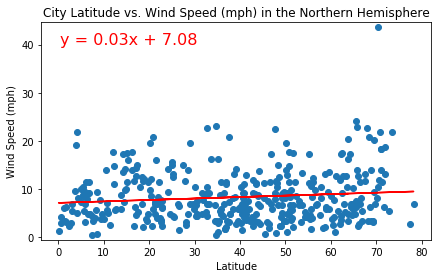

In [51]:
linreg_plot("North","Wind Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.00930020147911042


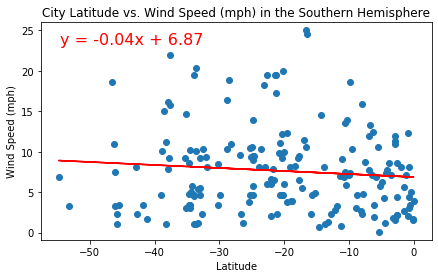

In [52]:
linreg_plot("South","Wind Speed")

The above two scatter plots show the change in wind speed (mph) in cities across the northern and southern hemisphere respectively as latitude changes. They are overlaid with their respective linear regression line, which show that there are no strong relationships between latitude and wind speed in either of the northern or southern hemisphere. In the northern hemisphere, there is an outlier with a very high wind speed on the day of the data collection (30 June 2020). Removing the outlier may allow for better visualisation of the spread in wind speed across cities between the northern and southern hemisphere.

Based on the retrieved data, the three observable trends are that:
1. There is a positive correlation between city temperature and latitude in cities from the southern hemisphere, reflecting the fact that world temperature increases closer to the equator and away from the south pole.
2. There is a negative correlation between city temperature and latitude in cities from the northern hemisphere, reflecting the fact that world temperature increases closer to the equator and away from the north pole.
3. Most cities in the dataset have a windspeed between 0 to 25mph, with no strong association beween city latitude and wind speed.